**For project 1 problem 5, click [here](#problem-5)**.

**For project 1 problem 6, click [here](#problem-6)**.

# Approximation Theory
Chebyshev polynomials. Chebyshev and Fourier series. Applications to solving PDEs.
### References: 
[1]. Gil, Amparo, Segura, Javier, Temme, Nico M. Numerical methods for special functions. SIAM 2007 Philadelphia, Pa. https://epubs.siam.org/doi/book/10.1137/1.9780898717822

[2]. Lloyd N. Trefethen, Spectral Methods in MATLAB, SIAM 2000 Philadelphia, Pa. https://epubs.siam.org/doi/book/10.1137/1.9780898719598

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

fig_size = (4,4)
fsz = 10 # font size
plt.rcParams.update({'font.size': fsz})


In [2]:
# Chebyshev polynomials
def Tsch(n,x):
    return np.cos(n*np.arccos(x))

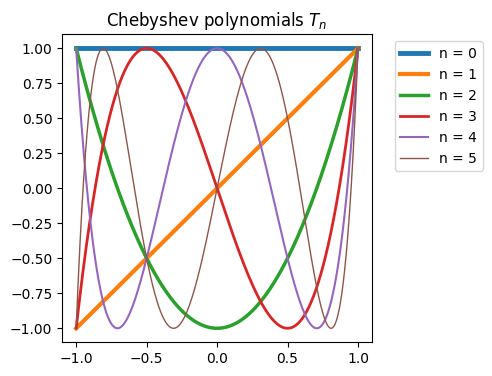

In [3]:
fig, ax = plt.subplots(figsize = fig_size)

Nx = 1001
x = np.linspace(-1,1,Nx)
for n in range(6):
    plt.plot(x,Tsch(n,x),linewidth = 0.5*(7-n),label = f"n = {n}")

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(r"Chebyshev polynomials $T_n$")
plt.savefig("Figures/Chebyshev_poly.pdf", bbox_inches='tight')

# Three-term recurrence relations 
Read Section 3.3 in [1]
$$T_0 = 1,\quad T_1 = x,\quad T_{n+1} = 2xT_{n} - T_{n-1}$$
Explanation: 
$$\cos((n+1)t) + \cos((n-1)t) = 2\cos(nt)\cos(t),\quad \cos(t) = x$$

In [4]:
# Generate Chebyshev polynomials using three-term recurrence relations 
N = 10
coeffs = np.zeros((N,N),dtype = int)
coeffs[0,0] = 1
coeffs[1,0] = 1
print("T_0 = 1")
print("T_1 = x")
for n in range(1,N-1):
    coeffs[n+1,:] = 2*coeffs[n,:] - np.roll(coeffs[n-1,:],2)
    print(f"T_{n+1}(x) = {coeffs[n+1,0]} * x^{n+1}",end = " ")
    for k in range(1,n+2):
        if coeffs[n+1,k] > 0:
            if n+1-k > 1:
                print(f" + {coeffs[n+1,k]} * x^{n+1-k}",end = " ")
            elif n+1-k == 1:
                print(f" + {coeffs[n+1,k]} * x",end = " ")
            else:
                print(f" + {coeffs[n+1,k]}",end = " ")                
        elif coeffs[n+1,k] < 0:
            if n+1-k > 1:
                print(f" - {-coeffs[n+1,k]} * x^{n+1-k}",end = " ")
            elif n+1-k == 1:
                print(f" - {-coeffs[n+1,k]} * x",end = " ")
            else:
                print(f" - {-coeffs[n+1,k]}",end = " ")                
    print("")

 # NOTE: the leading coefficient of T_n is 2^{n-1}   

T_0 = 1
T_1 = x
T_2(x) = 2 * x^2  - 1 
T_3(x) = 4 * x^3  - 3 * x 
T_4(x) = 8 * x^4  - 8 * x^2  + 1 
T_5(x) = 16 * x^5  - 20 * x^3  + 5 * x 
T_6(x) = 32 * x^6  - 48 * x^4  + 18 * x^2  - 1 
T_7(x) = 64 * x^7  - 112 * x^5  + 56 * x^3  - 7 * x 
T_8(x) = 128 * x^8  - 256 * x^6  + 160 * x^4  - 32 * x^2  + 1 
T_9(x) = 256 * x^9  - 576 * x^7  + 432 * x^5  - 120 * x^3  + 9 * x 


# Orthogonality relations
### Continuous
$$\int_{-1}^1 \frac{T_r(x)T_s(x)}{(1-x^2)^{1/2}}dx = \begin{cases}0,&r\neq s\\ \frac{1}{2}\pi, & r = s\neq 0\\ \pi, & r =s = 0\end{cases}$$
### Discrete
#### Zeros of $T_{n+1}$ grid:
$$ x_j = \cos\left(\frac{(j+\frac{1}{2})\pi}{n+1}\right),\quad j = 0,\ldots,n$$
$$\sum_{j=0}^n T_r(x_j)T_s(x_j) = \begin{cases}0,&r\neq s\\ \frac{1}{2}(n+1), & 1\le r = s\le n\\ n, & r = s = 0\end{cases}$$
#### Extrema of $T_{n}$ grid:
$$ x_j = \cos\left(\frac{j\pi}{n}\right),\quad j = 0,\ldots,n$$
$$ \frac{1}{2}T_r(-1)T_s(-1) + \frac{1}{2}T_r(1)T_s(1) + \sum_{j=1}^{n-1} T_r(x_j)T_s(x_j) = \begin{cases}0,&r\neq s\\ \frac{1}{2}n, & 1\le r = s\le n-1\\ n, & r = s = 0,~n\end{cases}$$

# Interpolation and Runge phenomenon
Read Section 3.2 in [1].
#### The task of interpolation
Given nodes $x_0<x_1<\ldots<x_n\in[a,b]$ and a function $f(x)$, find a polynomial $p_n$ of degree $n$ such that $f(x_j) = p_n(x_j)$.
Such a polynomial exists and is unique. It can be found using Lagrange's approach (easy to construct, but harder to add a new point) or Newton's approach (harder to construct, but easier to add points). 
#### Interpolation error
$$E_n(x) = f(x) - p_n(x) = \frac{f^{(n+1)}(\zeta_x)}{(n+1)!}\pi_{n+1}(x),$$
where $\pi_{n+1}(x) = \prod_{j=0}^{n}(x-x_j)$ is the nodal polynomial.
#### Runge Phenomenon
$E_n(x)$ may blow up with the growth of $n$ even for infinitely differentiable functions. This is caused by the growth of $\pi_{n+1}(x)$ with $n$ and the fact that the fraction $\frac{f^{(n+1)}(\zeta_x)}{(n+1)!}$ may not decay fast enough even for infinitely differentiable functions.

A famous example to illustrate the Runge phenomenon: Witch of Agnesi $f(x) = \frac{1}{1+x^2}$ on $x\in[-5,5]$.

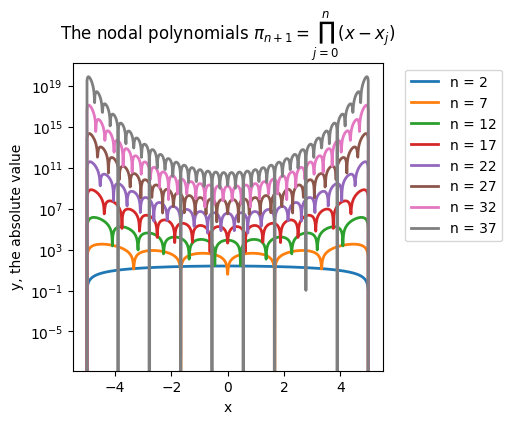

In [5]:
# The nodal polynomial for the uniform nodes on [-5,5]
fig, ax = plt.subplots(figsize = fig_size)
Nx = 1000
x = np.linspace(-5,5,Nx)
for n in range(2,40,5):
    nodes = np.linspace(-5,5,n)
    nodal_poly = np.ones_like(x)
    for j in range(n):
        nodal_poly = nodal_poly*(x-nodes[j])
    plt.plot(x,np.abs(nodal_poly),linewidth = 2,label = f"n = {n}")
ax.set_yscale('log')   
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("x")
plt.ylabel("y, the absolute value")
plt.title(r"The nodal polynomials $\pi_{n+1} = \prod_{j=0}^n(x-x_j)$")
plt.savefig("Figures/Nodal_poly.pdf", bbox_inches='tight')

# Newton's interpolating polynomial
Nodes: $x_0$, $x_1$, $\ldots$, $x_n$.
$$ p_n(x) = f[x_0] + (x-x_0)f[x_0,x_1] + \ldots + (x-x_0)(x-x_1)\ldots(x-x_{n-1})f[x_0,x_1,\ldots,x_n]$$
The coefficients $f[\ldots]$ are called the **divided differences**. They are computed recursively:
$$f[x_j] = f(x_j),\quad j=0,1,\ldots,n$$
$$f[x_j,x_{j+1}] = \frac{f[x_{j+1}]-f[x_j]}{x_{j+1}-x_j},\quad j = 0,1,\ldots,n-1$$
$$\ldots$$
$$f[x_j,x_{j+1},\ldots,x_{j+k}] = \frac{f[x_{j+1},\ldots,x_{j+k}]-f[x_j,\ldots,x_{j+k-1}]}{x_{j+k}-x_j},\quad j = 0,1,\ldots,n-k$$
$$\ldots$$
$$f[x_0,x_1,\ldots,x_n] = \frac{f[x_1,\ldots,x_n]-f[x_0,\ldots,x_{n-1}]}{x_{n}-x_0}$$
#### Evaluation of Newton's interpolant
$$v = f[x_0,x_1,\ldots,x_n]$$
$$v = v(x-x_{n-1}) + f[x_0,\ldots,x_{n-1}]$$
$$\ldots$$
$$v = v(x-x_{n-k}) + f[x_0,\ldots,x_{n-k}]$$
$$\ldots$$
$$v = v(x-x_0) + f[x_0]$$

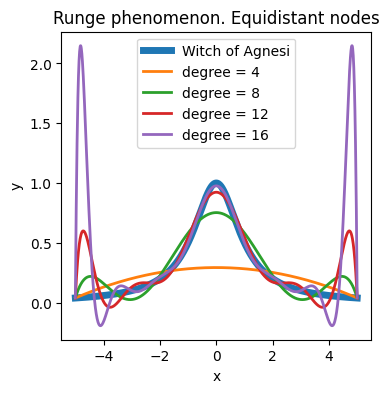

In [6]:
# Polynomial interpolation of the Witch of Agnesi on [-5,5] with uniform nodes
def Newton_poly(n,fn,nodes):    
    div_diff = np.zeros((n,n+1))
    div_diff[:,0] = fn
    for k in range(1, n+1):  
        for i in range(n-k): 
            div_diff[i, k] = (div_diff[i+1, k-1] - div_diff[i, k-1]) / (nodes[i+k] - nodes[i])
    return div_diff

def Newton_polyval(n,div_diff,nodes,x):
    p = div_diff[0,n]
    for k in range(n):
        p = p*(x-nodes[n-k-1]) + div_diff[0,n-1-k]
    return p

def WitchOfAgnesi(x):
    return 1/(1 + x**2)
    
fig, ax = plt.subplots(figsize = fig_size)
Nx = 1000
x = np.linspace(-5,5,Nx)
plt.plot(x,WitchOfAgnesi(x),linewidth = 5,label = "Witch of Agnesi")
for n in range(4,17,4):
    nodes = np.linspace(-5,5,n)
    fn = WitchOfAgnesi(nodes)
    div_diff = Newton_poly(n,fn,nodes)
    p = Newton_polyval(n,div_diff,nodes,x)
    plt.plot(x,p,linewidth = 2,label = f"degree = {n}")
# ax.set_yscale('log')   
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Runge phenomenon. Equidistant nodes")
plt.savefig("Figures/Runge_WitchOfAgnesi.pdf", bbox_inches='tight')

# Chebyshev interpolation
Read Section 3.4 in [1].

**Theorem:** The scaled Chebyshev polynomial $2^{-n}T_{n+1}(x)$ of degree $n$ deviates from 0 by $2^{-n}$ on $[-1,1]$, which is the least among all polynomials of degree $n+1$ with leading coefficient 1.

$Proof:$
 Suppose there is a monic polynomial $p(x)$ of degree $n+1$ such that $|p(x)|<2^{-n}$ for all $x\in[-1,1]$.
 Let $x_k'$, $k=0,1,\ldots,n+1$ be the abscissas of the extreme values of Chebyshev polynomials of degree $n+1$.
 Hence we have
 $$p(x_0')<2^{-n}T_{n+1}(x_0'),$$
 $$p(x_1')>2^{-n}T_{n+1}(x_1'),$$
 $$p(x_2')<2^{-n}T_{n+1}(x_2'),$$
 $$\ldots$$
 Therefore the polynomial
 $$Q(x)=p(x)-2^{-n}T_{n+1}(x)$$
 changes sign between each two consecutive extrema of $T_{n+1}$. $T_{n+1}(x)$ has $n+2$ extrema on $[-1,1]$.
 Hence $Q(x)$ has at least $n+1$ zeros: at least one zero lies between each pair of neighboring extrema of $T_{n+1}$ as $Q(x)$ changes sign between them. But $Q(x)$ is of degree $\le n$.
 Thus, we have arrived at a contradiction. Hence, there is no such monic polynomial $p$ of degree $n+1$ such that 
 $|p(x)|<2^{-n}$ for $x\in[-1,1]$.
 Q.E.D.


***The construction of Chebyshev's interpolant*** is simplified due to the discrete orthogonality relations.

#### Nodes are zeros of $T_{n+1}(x)$
$$c_k = \frac{2}{n+1}\sum_{j=0}^nf(x_j)T_k(x_j) \equiv \frac{2}{n+1}\sum_{j=0}^nf(\cos(t_j))\cos(kt_j),\quad t_j = \left(j+\frac{1}{2}\right)\frac{\pi}{n+1}$$

Chebyshev sum $S_n(x) = \frac{c_0}{2} + \sum_{k=1}^n c_kT_k(x)$ can be efficiently evaluated using Clenshaw's method (see Section 3.7 in [1]).


#### Clenshaw's method for evaluating Chebyshev sums

Suppose we need to evaluate the sum
$$
p_n(y) = \frac{c_0}{2} + \sum_{k=1}^nc_kT_k(x),\quad {\rm where}\quad x = \frac{2y-a-b}{b-a}.
$$
We rewrite this sum in the vector form:
$$
p_n(y) = \mathbf{c}^\top \mathbf{t} - \frac{c_0}{2},
$$
where $\mathbf{c}: = [c_0,c_1,\ldots,c_n]^\top$, $\mathbf{t}: = [T_0(x),T_1(x),\ldots,T_n(x)]^\top$.
Recall that the Chebyshev polynomials satisfy three-term recurrence relations, which can be written in the matrix form as
$$
\begin{bmatrix}1&&&&&\\-2x&1&&&&\\1&-2x&1&&&\\&1&-2x&1&&\\&&\ddots&\ddots&\ddots&\\&&&1&-2x&1\end{bmatrix}
\begin{bmatrix}T_0(x)\\T_1(x)\\T_2(x)\\\vdots\\T_n(x)\end{bmatrix} = 
\begin{bmatrix}1\\-x\\0\\\vdots\\0\end{bmatrix} \equiv A\mathbf{t} = \mathbf{d}.
$$
Let $\mathbf{b}$ be a vector such that 
$$\mathbf{b}^\top A = \mathbf{c}^\top,\quad{\rm or}\quad A^\top\mathbf{b} = \mathbf{c}.$$
Note that $\mathbf{b}$ is readily found starting from $b_n$ as $A^\top$ is upper-triangular.
Then
$$
p_n(y) = \mathbf{c}^\top \mathbf{t} - \frac{c_0}{2} = \mathbf{b}^\top A\mathbf{t} -  \frac{c_0}{2} $$
$$=  \mathbf{b}^\top\mathbf{d} -  \frac{c_0}{2}  = b_0 - b_1x -  \frac{c_0}{2}. $$
Then we find
$$
c_0 = b_0-2xb_1 + b_2.
$$
Therefore,
$$
p_n(y)  = b_0 - b_1x -  \frac{c_0}{2} = b_0 - b_1x -  \frac{1}{2}(b_0-2xb_1 + b_2) = \frac{1}{2}(b_0-b_2).
$$

#### Clenshaw's Algorithm for a low-level programming language:

Input: x, $c_0,\ldots,c_n$

Set $b_{n+1} = 0$; $~b_n = c_n$

For $r = n-1, n-2,\ldots , 0,$ set $b_r = 2xb_{r+1} - b_{r+2} + c_r$

Return $S_N = \frac{1}{2}(b_0-b_2)$


In [7]:
# Polynomial interpolation with Chebyshev nodes zeros of T_{n+1}(x)

def Cheb_coeffs1(n,func):
    c = np.zeros((n+1,))
    t = (np.arange(n+1)+0.5)*np.pi/(n+1) 
    for k in range(n+1):
        c[k] = 2*np.sum(func(np.cos(t))*np.cos(k*t))/(n+1)
    return c

def ChebSum1_Clenshaw_matrix(n,x,c):
    diagonals = [np.ones((n+1,)),-2*x*np.ones((n,)),np.ones((n-1,))]
    A = scipy.sparse.diags(diagonals,[0,-1,-2],shape=(n+1,n+1))
    A = A.toarray()
    b = scipy.linalg.solve_triangular(np.transpose(A),c,lower = False) # Upper-triangular solver
    return 0.5*(b[0] - b[2])
    
   

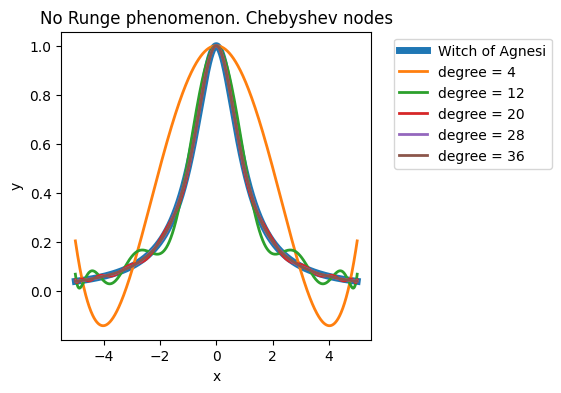

In [8]:
# Polynomial interpolation of the Witch of Agnesi on [-5,5] 
fig, ax = plt.subplots(figsize = fig_size)
Nx = 1000
Xmin = -5
Xmax = 5
shift = (Xmin + Xmax)*0.5
scale = (Xmax - Xmin)*0.5

def func_WofA(x):
    return WitchOfAgnesi(shift + x*scale)
    
x = np.linspace(-1,1,Nx)
p = np.zeros_like(x)

plt.plot(shift+scale*x,func_WofA(x),linewidth = 5,label = "Witch of Agnesi")

for n in range(4,40,8):
    coeffs = Cheb_coeffs1(n,func_WofA)
    for j in range(Nx):
        p[j] = ChebSum1_Clenshaw_matrix(n,x[j],coeffs)
    plt.plot(shift+scale*x,p,linewidth = 2,label = f"degree = {n}")
# ax.set_yscale('log')   
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("x")
plt.ylabel("y")
plt.title("No Runge phenomenon. Chebyshev nodes")
plt.savefig("Figures/ChebyshevWitchOfAgnesi.pdf", bbox_inches='tight')

# Chebyshev interpolation errors. 
NE = 20
step = 8
nmin = 4
E_cheb_int_WofA = np.zeros((NE,))
deg = np.zeros((NE,),dtype = int)
for n in range(NE):
    deg[n] = nmin + n*step
    coeffs = Cheb_coeffs1(deg[n],func_WofA)
    for j in range(Nx):
        p[j] = ChebSum1_Clenshaw_matrix(deg[n],x[j],coeffs)
    E_cheb_int_WofA[n] = np.max(np.abs(p - func_WofA(x)))

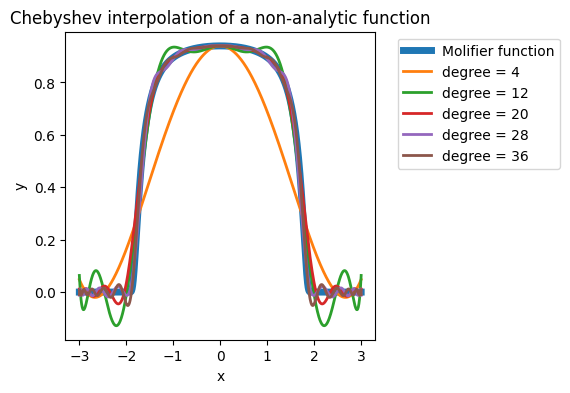

In [9]:
# Polynomial interpolation of an infinitely differentiable but non-analytic function
# f(x) = exp(-1./(4-x^2)), |x| <= 2, f(x) = 0, |x| > 3 on [-3,3] 
fig, ax = plt.subplots(figsize = fig_size)
Nx = 1000
Xmin = -3
Xmax = 3
shift = (Xmin + Xmax)*0.5
scale = (Xmax - Xmin)*0.5

def Molifier_func(x):
    x = np.squeeze(x)
    sz = np.size(x)
    if sz == 1:
        if np.abs(x) < 2:
            return np.exp(-1/(4-x**2)**2)
        else:
            return 0.
    else:
        ind1 = np.argwhere(np.abs(x) < 2)
        f = np.zeros_like(x)
        f[ind1] = np.exp(-1/(4-x[ind1]**2)**2)
        return f

        
def func_M(x):
    return Molifier_func(shift + x*scale)
    
x = np.linspace(-1,1,Nx)
p = np.zeros_like(x)
f = np.zeros_like(x)

for j in range(Nx):
    f[j] = func_M(x[j])
    
plt.plot(shift+scale*x,f,linewidth = 5,label = "Molifier function")

for n in range(4,40,8):
    coeffs = Cheb_coeffs1(n,func_M)
    for j in range(Nx):
        p[j] = ChebSum1_Clenshaw_matrix(n,x[j],coeffs)
    plt.plot(shift+scale*x,p,linewidth = 2,label = f"degree = {n}")
# ax.set_yscale('log')   
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Chebyshev interpolation of a non-analytic function")
plt.savefig("Figures/ChebyshevNonanalytic.pdf", bbox_inches='tight')
# Chebyshev interpolation errors. 

E_cheb_int_M = np.zeros((NE,))
deg = np.zeros((NE,),dtype = int)
for n in range(NE):
    deg[n] = nmin + n*step
    coeffs = Cheb_coeffs1(deg[n],func_M)
    for j in range(Nx):
        p[j] = ChebSum1_Clenshaw_matrix(deg[n],x[j],coeffs)
    E_cheb_int_M[n] = np.max(np.abs(p - func_M(x)))

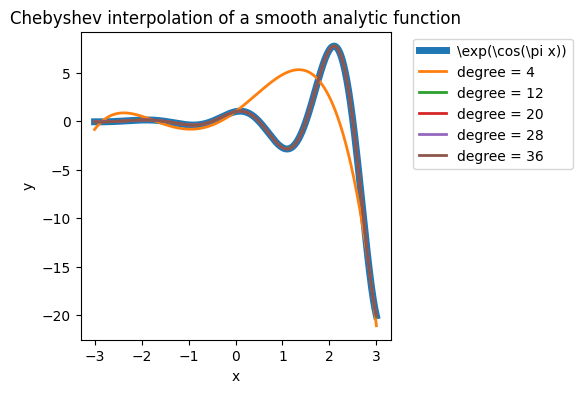

In [10]:
# Polynomial interpolation of an analytic function 
fig, ax = plt.subplots(figsize = fig_size)
Nx = 1000
Xmin = -3
Xmax = 3
shift = (Xmin + Xmax)*0.5
scale = (Xmax - Xmin)*0.5

def exp_cos(x):
    return np.exp(x)*np.cos(np.pi*x)

def func(x):
    return exp_cos(shift + x*scale)
    
x = np.linspace(-1,1,Nx)
p = np.zeros_like(x)


plt.plot(shift+scale*x,func(x),linewidth = 5,label = r"\exp(\cos(\pi x))")

for n in range(4,40,8):
    coeffs = Cheb_coeffs1(n,func)
    for j in range(Nx):
        p[j] = ChebSum1_Clenshaw_matrix(n,x[j],coeffs)
    plt.plot(shift+scale*x,p,linewidth = 2,label = f"degree = {n}")
# ax.set_yscale('log')   
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Chebyshev interpolation of a smooth analytic function")
plt.savefig("Figures/ChebyshevAnalytic.pdf", bbox_inches='tight')
# Chebyshev interpolation errors. 
NE = 20
step = 8
nmin = 4
E_cheb_int_ecos = np.zeros((NE,))
deg = np.zeros((NE,),dtype = int)
for n in range(NE):
    deg[n] = nmin + n*step
    coeffs = Cheb_coeffs1(deg[n],func)
    for j in range(Nx):
        p[j] = ChebSum1_Clenshaw_matrix(deg[n],x[j],coeffs)
    E_cheb_int_ecos[n] = np.max(np.abs(p - func(x)))

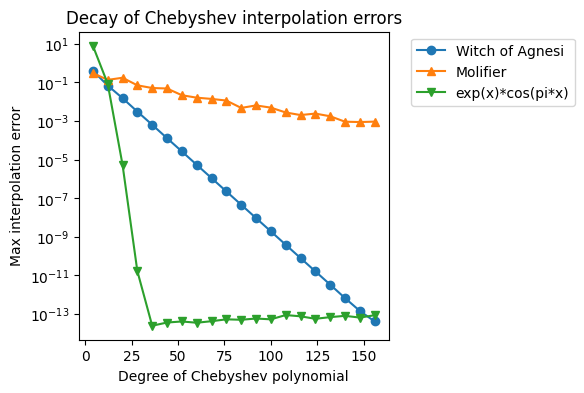

In [11]:
# plot errors
fig, ax = plt.subplots(figsize = fig_size)
plt.plot(deg,E_cheb_int_WofA,'-o',label = "Witch of Agnesi")
plt.plot(deg,E_cheb_int_M,'-^',label = "Molifier")
plt.plot(deg,E_cheb_int_ecos,'-v',label = "exp(x)*cos(pi*x)")
plt.xlabel("Degree of Chebyshev polynomial")
plt.ylabel("Max interpolation error")
ax.set_yscale('log')   
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Decay of Chebyshev interpolation errors")
plt.savefig("Figures/Chebyshev_decay.pdf", bbox_inches='tight')

In [12]:
# Polynomial interpolation with Chebyshev nodes extrema of T_{n}(x)

def Cheb_coeffs2(n,func):
    c = np.zeros((n+1,))
    t = (np.arange(n+1))*np.pi/n 
    for k in range(n+1):
        c[k] = 2*np.sum(func(np.cos(t))*np.cos(k*t))/n \
                  -func(np.cos(t[0]))*np.cos(k*t[0])/n \
                  -func(np.cos(t[-1]))*np.cos(k*t[-1])/n
    return c

def ChebSum2_Clenshaw_matrix(n,x,c):
    diagonals = [np.ones((n+1,)),-2*x*np.ones((n,)),np.ones((n-1,))]
    A = scipy.sparse.diags(diagonals,[0,-1,-2],shape=(n+1,n+1))
    A = A.toarray()
    b = scipy.linalg.solve_triangular(np.transpose(A),c,lower = False) # Upper-triangular solver
    return 0.5*(b[0] - b[2] - b[n]*np.cos(n*np.arccos(x)))
    
   

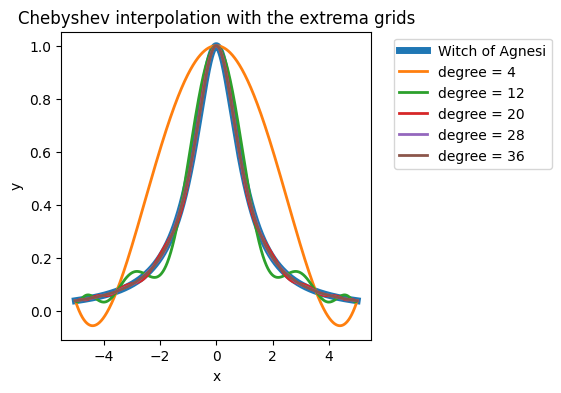

In [13]:
# Polynomial interpolation of the Witch of Agnesi on [-5,5] using the extrema grid
fig, ax = plt.subplots(figsize = fig_size)
Nx = 1000
Xmin = -5
Xmax = 5
shift = (Xmin + Xmax)*0.5
scale = (Xmax - Xmin)*0.5

def func_WofA(x):
    return WitchOfAgnesi(shift + x*scale)
    
x = np.linspace(-1,1,Nx)
p = np.zeros_like(x)

plt.plot(shift+scale*x,func_WofA(x),linewidth = 5,label = "Witch of Agnesi")

for n in range(4,40,8):
    coeffs = Cheb_coeffs2(n,func_WofA)
    for j in range(Nx):
        p[j] = ChebSum2_Clenshaw_matrix(n,x[j],coeffs)
    plt.plot(shift+scale*x,p,linewidth = 2,label = f"degree = {n}")
# ax.set_yscale('log')   
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Chebyshev interpolation with the extrema grids")
plt.savefig("Figures/Chebyshev_WitchOfAgnesi_ExtremaGrid.pdf", bbox_inches='tight')

# Chebyshev interpolation errors. 
NE = 20
step = 8
nmin = 4
E_cheb_int_WofA = np.zeros((NE,))
deg = np.zeros((NE,),dtype = int)
for n in range(NE):
    deg[n] = nmin + n*step
    coeffs = Cheb_coeffs2(deg[n],func_WofA)
    for j in range(Nx):
        p[j] = ChebSum2_Clenshaw_matrix(deg[n],x[j],coeffs)
    E_cheb_int_WofA[n] = np.max(np.abs(p - func_WofA(x)))

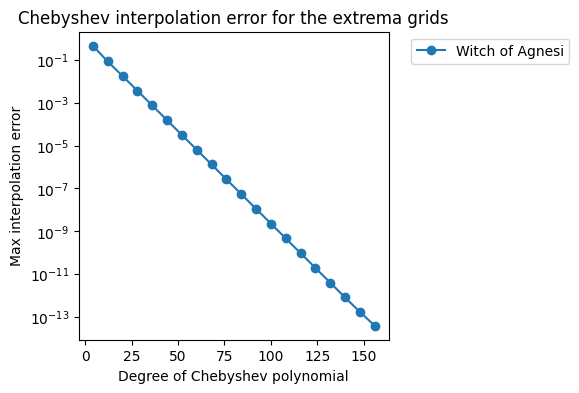

In [14]:
# plot errors
fig, ax = plt.subplots(figsize = fig_size)
plt.plot(deg,E_cheb_int_WofA,'-o',label = "Witch of Agnesi")
# plt.plot(deg,E_cheb_int_M,'-^',label = "Molifier")
# plt.plot(deg,E_cheb_int_ecos,'-v',label = "exp(x)*cos(pi*x)")
plt.xlabel("Degree of Chebyshev polynomial")
plt.ylabel("Max interpolation error")
ax.set_yscale('log')   
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Chebyshev interpolation error for the extrema grids")
plt.savefig("Figures/Chebyshev_WitchOfAgnesi_decay_ExtremaGrid.pdf", bbox_inches='tight')


# Application of Chebyshev interpolants to solving PDEs
Read Chapter 6 in [2].

Since we often need to prescribe boundary conditions, we use the extrema grid, i.e., the nodes are the extrema of $T_n(x),$ which are $x_j = \cos\left(\frac{\pi j}{n}\right)$, $j=0,1,\ldots,n$.

Suppose a polynomial $p_n(x)$ interpolates $f(x)$ at $\{x_j\}_{j=0}^n$. We approximate the derivative of $f(x)$ with the derivative of $p_n(x)$. 

This is implemented by multiplying the vector of values of $f(x)$ at the grid points by the differentiation matrix $D_n$. ***The construction of the interpolation polynomial is not required.*** The formulas for the entries of $D_n$ are found on page 73 of the PDF of [2] (page 53 of the book) -- see Theorem 7. The MATLAB implementation cheb.m is on page 74 of the PDF of [2] (page 54 of the book). 

We rewrite Trefethen's cheb.m in Python.

In [15]:
# Trefeten's cheb.m (see page 74 of PDF of [2]) rewritten in Python
def cheb(N):
    if N == 0:
        D = 0
        x = 1
        return D,x
    x = np.cos(np.pi*np.arange(N+1)/N)
    c = np.ones((N+1,))
    c[0] = 2
    c[N] = 2
    c[1::2] = -c[1::2]
    # create an (N+1)-by-(N+1) matrix whose columns are the vectors of Chebychev nodes
    X = np.zeros((N+1,N+1))
    for j in range(N+1):
        X[:,j] = x
    dX = X - np.transpose(X)
    D = np.outer(c,1/c)/(dX + np.eye(N+1)) # off-diagonal entries
    D = D - np.diag(np.sum(D,axis = 1)) # D[i,i] = -\sum_{j\neq i} D[i,j] 
    return D,x
    

# Application to solving a 1D committor boundary-value problem
This is an adjustment of Trefethen's Program 13 on page 84 of the PDF of [2] to a 1D committor problem with nonhomogeneous boundary conditions and a need for rescaling.

Consider a 1D overdamped Langevin dynamics in a double-well potential $V(z) = \frac{1}{4}z^4-\frac{1}{2}z^2$ 
$$ Z_t = -V'(Z_t)dt + \sqrt{2\beta^{-1}}dW_t,$$
where $\beta$ is the inverse temperature.

We define the left and the right wells as $A = \{z\le -0.9\}$ and $B = \{z>0.9\}$, respectively
We want to find the committor function $q(z)$, i.e., the probability that a process starting at $z$ will first hit $B$ rather than $A$. The committor is the solution to the following boundary-value problem for the backward Kolmogorov equation:
$$ q'' - \beta V'(z) q' = 0,\quad z\in(-0.9,0.9),\quad q(-0.9) = 0,\quad q(0.9) = 1.$$

We solve the committor problem using a Chebyshev spectral method as follows.

**Step 1.** Rescale the problem to the interval $[-1,1]$: $x\in[-1,1]$, $z = 0.9x$.

**Step 2.** Make the boundary conditions homogeneous: $q = q_{\sf bdry} + u$, where $q_{\sf bdry}$ is an arbitrary function that satisfies the nonhomogeneous boundary conditions and $u(-1) = u(1) = 0$. We choose $q_{\sf bdry} = \frac{1}{2} + \frac{1}{2}x$.

**Step 3.** Solve the PDE. For $x\in(-1,1)$, we substitute $q = q_{\sf bdry} + u$ into the committor PDE and obtain:
$$u'' - \beta V'(z) u' = \beta V'(z)[q_{\sf bdry}]'.$$
We solve this equation for $u$.

**Step 4.** Reassemble the solution $q = q_{\sf bdry} + u$. To evaluate $q$ at any point $x\in[-1,1]$, compute the Chebyshev coefficients for $q$ and use the **ChebSum2_Clenshaw_matrix** function defined in a previous window. Plot $q$ versus $z\in[-0.9,0.9]$.

In [16]:
# A 1D committor solver, based on a Chebyshev spectral method
def Vder(z):
    return z**3 - z

beta = 10 # the inverse temperature
zmin = -0.9
zmax = 0.9
scale = 0.5*(zmax - zmin)
shift = 0.5*(zmax + zmin)

def solve1Dcommittor(N,scale,shift,f,x_evaluate):
    def qbdry(x):
        return 0.5 + 0.5*x
    D,x = cheb(N)
    D2 = np.matmul(D,D)
    b = beta*f(shift+scale*x)
    D2 = D2[np.ix_(range(1,N),range(1,N))]
    D = D[np.ix_(range(1,N),range(1,N))]
    A = D2 - np.matmul(np.diag(b[1:N]),D)
    RHS = b*0.5 # -Aq_{bdry} computed exactly
    u = np.zeros((N+1,))
    u[1:N] = np.linalg.solve(A,RHS[1:N])
    q = qbdry(x) + u
    # evaluate q at x_evaluate
    cheb_coeff = np.zeros((N+1,))
    t = (np.arange(N+1))*np.pi/N 
    for k in range(n+1):
        cheb_coeff[k] = 2*np.sum(q*np.cos(k*t))/N - q[0]*np.cos(k*t[0])/N - q[N]*np.cos(k*t[-1])/N
    N_eval = np.size(x_evaluate)
    q_out = np.zeros_like(x_evaluate)
    for j in range(N_eval):
        q_out[j] = ChebSum2_Clenshaw_matrix(N,x_evaluate[j],cheb_coeff)
    return q_out

In [17]:
# Solve the committor problem on the Chebyshev extrema grid of different sizes
Nx = 1000
x_eval = np.linspace(-1,1,Nx)
sol_list = []
nlist = [10,20,40,80]
N_list = len(nlist)
for n in nlist:
    q_out = solve1Dcommittor(n,scale,shift,Vder,x_eval)
    sol_list.append(q_out)    

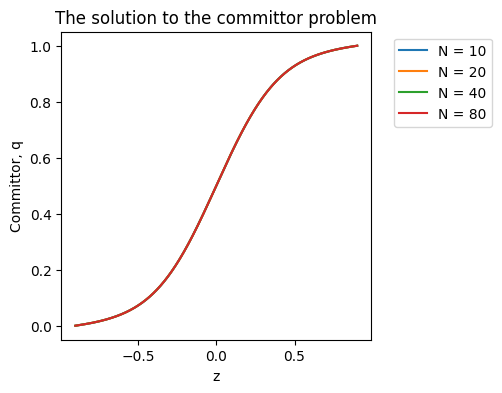

In [18]:
# plot the solution
fig, ax = plt.subplots(figsize = fig_size)

for j in range(N_list):
    z = np.linspace(zmin,zmax,Nx)
    q = sol_list[j]
    plt.plot(z,q,label = f"N = {nlist[j]}")
plt.xlabel("z")
plt.ylabel("Committor, q")
# ax.set_yscale('log')   
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("The solution to the committor problem")
plt.savefig("Figures/Chebyshev_CommittorDoubleWell.pdf", bbox_inches='tight')


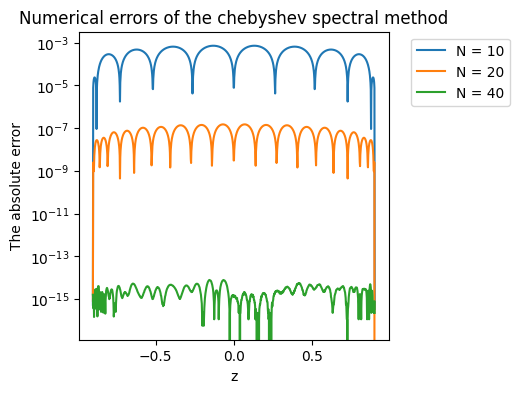

In [19]:
# plot the absolute error
fig, ax = plt.subplots(figsize = fig_size)
q_ref = sol_list[-1]
for j in range(N_list-1):
    q = sol_list[j]
    plt.plot(z,abs(q-q_ref),label = f"N = {nlist[j]}")
plt.xlabel("z")
plt.ylabel("The absolute error")
ax.set_yscale('log')   
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Numerical errors of the chebyshev spectral method")
plt.savefig("Figures/Chebyshev_CommittorErrors.pdf", bbox_inches='tight')


# Problem 5

In [20]:
def u_exact(x):
    return np.cos(np.pi * x) + 1

def compute_g(x):
    # u_exact = cos(π*x) + 1
    # g(x) = cos(π*x)*(π⁴ + 4*π² + 3) + 3 
    coeff = np.pi**4 + 4*np.pi**2 + 3
    return coeff * np.cos(np.pi * x) + 3


In [21]:
def solve_fourth_order_bvp(N):
    """
    N: Number of Chebyshev extrema points
    x: Chebyshev extrema grid points
    u: Solution values at grid points
    """
    
    D, x = cheb(N)
    D2 = np.linalg.matrix_power(D, 2)  # second derivative
    D4 = np.linalg.matrix_power(D, 4)  # fourth derivative
    
    I = np.eye(N+1)
    L = D4 - 4*D2 + 3*I
    
    g = compute_g(x)
    
    # boundary conditions
    # u(1) = 0
    L[0, :] = 0; L[0, 0] = 1; g[0] = 0
    # u'(1) = 0
    L[1, :] = D[0, :]; g[1] = 0
    # u'(-1) = 0
    L[N-1, :] = D[N, :]; g[N-1] = 0 
    # u(-1) = 0
    L[N, :] = 0; L[N, N] = 1; g[N] = 0
    

    u = np.linalg.solve(L, g)
    
    return x, u


N_values = [10, 20, 40, 60]
solutions = {}

for N in N_values:
    x_cheb, u_cheb = solve_fourth_order_bvp(N)
    solutions[N] = (x_cheb, u_cheb)
    
    # Check boundary conditions
    u_1 = u_cheb[0]
    u_neg1 = u_cheb[N]
    
    print(f"N = {N:2d}: u(1) = {u_1:8.2e}, u(-1) = {u_neg1:8.2e}")


N = 10: u(1) = -2.72e-14, u(-1) = 0.00e+00
N = 20: u(1) = 1.27e-12, u(-1) = 0.00e+00
N = 40: u(1) = 1.65e-12, u(-1) = 0.00e+00
N = 60: u(1) = 2.12e-10, u(-1) = 0.00e+00


In [22]:
# evaluate using Clenshaw's method
def evaluate_solution_uniform_grid(N, n_uniform=1000):
    
    x_cheb, u_cheb = solve_fourth_order_bvp(N)
    

    n = N
    c = np.zeros(n+1)
    t = np.arange(n+1) * np.pi / n
    
    for k in range(n+1):
        c[k] = 2 * np.sum(u_cheb * np.cos(k * t)) / n
        if k > 0:
            c[k] -= u_cheb[0] * np.cos(k * t[0]) / n
            c[k] -= u_cheb[n] * np.cos(k * t[n]) / n
    
    # grid
    x_uniform = np.linspace(-1, 1, n_uniform)
    u_uniform = np.zeros(n_uniform)
    
    for j in range(n_uniform):
        u_uniform[j] = ChebSum2_Clenshaw_matrix(n, x_uniform[j], c)
    
    return x_uniform, u_uniform


uniform_solutions = {}

for N in N_values:
    x_uniform, u_uniform = evaluate_solution_uniform_grid(N, 1000)
    uniform_solutions[N] = (x_uniform, u_uniform)

    u_exact_uniform = u_exact(x_uniform)
    error = np.max(np.abs(u_uniform - u_exact_uniform))
    
    print(f"N = {N:2d}: Max error on uniform grid = {error:.2e}")


N = 10: Max error on uniform grid = 7.29e-05
N = 20: Max error on uniform grid = 1.31e-12
N = 40: Max error on uniform grid = 1.19e-11
N = 60: Max error on uniform grid = 2.13e-10


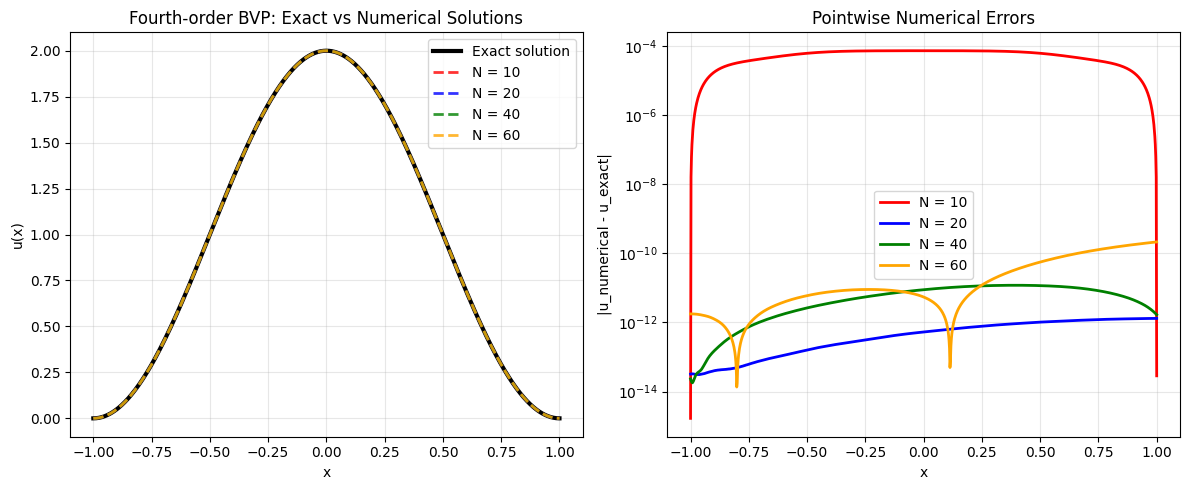

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# solutions comparison
x_plot = np.linspace(-1, 1, 1000)
u_exact_plot = u_exact(x_plot)

ax1.plot(x_plot, u_exact_plot, 'k-', linewidth=3, label='Exact solution')

colors = ['red', 'blue', 'green', 'orange']
for i, N in enumerate(N_values):
    x_uniform, u_uniform = uniform_solutions[N]
    ax1.plot(x_uniform, u_uniform, '--', color=colors[i], linewidth=2, 
             label=f'N = {N}', alpha=0.8)

ax1.set_xlabel('x')
ax1.set_ylabel('u(x)')
ax1.set_title('Fourth-order BVP: Exact vs Numerical Solutions')
ax1.legend()
ax1.grid(True, alpha=0.3)

# numerical errors
for i, N in enumerate(N_values):
    x_uniform, u_uniform = uniform_solutions[N]
    u_exact_uniform = u_exact(x_uniform)
    error = np.abs(u_uniform - u_exact_uniform)
    ax2.semilogy(x_uniform, error, color=colors[i], linewidth=2, 
                 label=f'N = {N}')

ax2.set_xlabel('x')
ax2.set_ylabel('|u_numerical - u_exact|')
ax2.set_title('Pointwise Numerical Errors')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("Figures/Fourth_order_BVP_solutions.pdf", bbox_inches='tight')
plt.show()


Convergence analysis:
N	Max Error	Reduction Factor
----------------------------------------
 8	3.17e-03	N/A
12	1.26e-06	2512.4
16	1.42e-10	8865.8
20	1.31e-12	108.9
24	1.12e-11	0.1
28	1.47e-11	0.8
32	1.41e-11	1.0
36	8.07e-12	1.7
40	1.19e-11	0.7
44	9.03e-11	0.1
48	5.32e-11	1.7
52	1.98e-10	0.3
56	1.37e-10	1.4
60	2.13e-10	0.6
64	2.16e-10	1.0


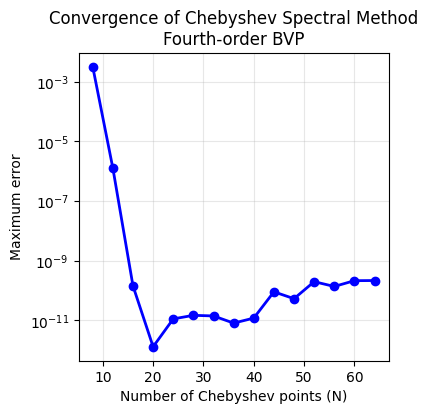

In [24]:
N_range = np.arange(8, 65, 4)
max_errors = []

print("Convergence analysis:")
print("N\tMax Error\tReduction Factor")
print("-" * 40)

prev_error = None
for N in N_range:
    try:
        x_uniform, u_uniform = evaluate_solution_uniform_grid(N, 1000)
        u_exact_uniform = u_exact(x_uniform)
        max_error = np.max(np.abs(u_uniform - u_exact_uniform))
        max_errors.append(max_error)
        
        reduction_factor = prev_error / max_error if prev_error is not None else None
        reduction_str = f"{reduction_factor:.1f}" if reduction_factor is not None else "N/A"
        
        print(f"{N:2d}\t{max_error:.2e}\t{reduction_str}")
        prev_error = max_error
        
    except np.linalg.LinAlgError:
        print(f"{N:2d}\tSingular matrix")
        max_errors.append(np.nan)

# plot
fig, ax = plt.subplots(figsize=fig_size)
valid_indices = ~np.isnan(max_errors)
ax.semilogy(N_range[valid_indices], np.array(max_errors)[valid_indices], 'bo-', linewidth=2, markersize=6)
ax.set_xlabel('Number of Chebyshev points (N)')
ax.set_ylabel('Maximum error')
ax.set_title('Convergence of Chebyshev Spectral Method\nFourth-order BVP')
ax.grid(True, alpha=0.3)

plt.savefig("Figures/Fourth_order_BVP_convergence.pdf", bbox_inches='tight')
plt.show()


# Problem 6

In [25]:
def u_exact_p6(x):
    return 1 / (1 + x**2)

def g_p6(x):
    """
    u(x) = 1/(1+x²)
    u'(x) = -2x/(1+x²)²
    u''(x) = (6x² - 2)/(1+x²)³  
    u'''(x) = 24x(1-x²)/(1+x²)⁴
    u⁽⁴⁾(x) = 24(5x⁴ - 10x² + 1)/(1+x²)⁵
    g(x) = u⁽⁴⁾(x) + u'(x) + u(x)
    """
    x2 = x**2
    denom1 = (1 + x2)
    denom2 = denom1**2
    denom5 = denom1**5
    
    u = 1 / denom1
    u_prime = -2*x / denom2
    u_fourth = 24*(5*x2**2 - 10*x2 + 1) / denom5
    
    return u_fourth + u_prime + u


In [26]:
def solve_fourth_order_bvp_p6(N):
    """
    scale to [-1,1]: x ∈ [-1,1], z ∈ [0,5], z = 2.5 + 2.5x
    decompose: u = v + b, v satisfies homogeneous BCs
    """
    
    D, x = cheb(N)

    D2 = np.linalg.matrix_power(D, 2)
    D4 = np.linalg.matrix_power(D, 4)
    
    # Scale from [-1,1] to [0,5]
    scale = 2.5
    shift = 2.5
    z = shift + scale * x
    
    
    # boundary conditions
    u_0 = 1
    u_5 = 1/26
    up_0 = 0
    up_5 = -10/676
    
    # u'(z) = (1/scale) * w'(x), w'(x) = scale * u'(z)
    wp_minus1 = scale * up_0
    wp_plus1 = scale * up_5
    

    def p0(x):
        return (x - 1)**2 * (x + 2) / 4
    
    def p1(x): 
        return (x + 1)**2 * (2 - x) / 4
    
    def q0(x):
        return (x - 1)**2 * (x + 1) / 4
    
    def q1(x):
        return (x + 1)**2 * (x - 1) / 4
    
    b = u_0 * p0(x) + u_5 * p1(x) + wp_minus1 * q0(x) + wp_plus1 * q1(x)
    
    b_prime = np.dot(D, b)
    b_fourth = np.dot(D4, b)
    

    
    g_vals = g_p6(z)
    
    # the equation for w = v + b becomes: d⁴v/dx⁴ + scale³ * dv/dx + scale⁴ * v = scale⁴ * g(z) - d⁴b/dx⁴ - scale³ * db/dx - scale⁴ * b
    rhs = scale**4 * g_vals - b_fourth - scale**3 * b_prime - scale**4 * b
    

    L = D4 + scale**3 * D + scale**4 * np.eye(N+1)
    
    # homogeneous boundary conditions for v
    # v(-1) = 0 (z = 0)
    L[N, :] = 0; L[N, N] = 1; rhs[N] = 0
    
    # v'(-1) = 0 (z = 0)  
    L[N-1, :] = D[N, :]; rhs[N-1] = 0
    
    # v(1) = 0 (z = 5)
    L[0, :] = 0; L[0, 0] = 1; rhs[0] = 0
    
    # v'(1) = 0 (z = 5)
    L[1, :] = D[0, :]; rhs[1] = 0
    
    v = np.linalg.solve(L, rhs)
    
    u = v + b
    
    return z, u

N_test = 20
z_test, u_test = solve_fourth_order_bvp_p6(N_test)

Solving for different N values:
N	u(0)		u(5)		Max Error
--------------------------------------------------
40	1.000000	0.038462	5.07e-10
50	1.000000	0.038462	7.46e-12
60	1.000000	0.038462	4.61e-11
70	1.000000	0.038462	1.05e-11


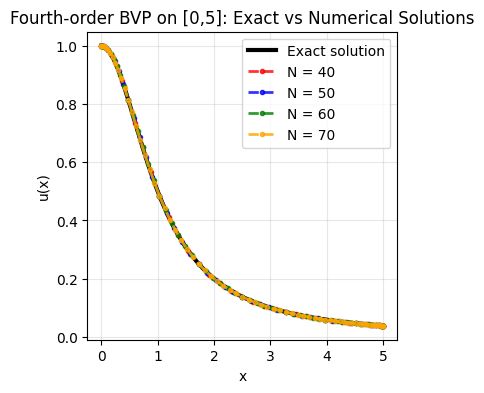

In [27]:
N_values_p6 = [40, 50, 60, 70]
solutions_p6 = {}

print("Solving for different N values:")
print("N\tu(0)\t\tu(5)\t\tMax Error")
print("-" * 50)

for N in N_values_p6:
    z_cheb, u_cheb = solve_fourth_order_bvp_p6(N)
    solutions_p6[N] = (z_cheb, u_cheb)
    
    # compute error
    u_exact_vals = u_exact_p6(z_cheb)
    max_error = np.max(np.abs(u_cheb - u_exact_vals))
    
    print(f"{N:2d}\t{u_cheb[-1]:.6f}\t{u_cheb[0]:.6f}\t{max_error:.2e}")

fig, ax = plt.subplots(figsize=fig_size)

# exact solution on fine grid
z_fine = np.linspace(0, 5, 1000)
u_exact_fine = u_exact_p6(z_fine)
ax.plot(z_fine, u_exact_fine, 'k-', linewidth=3, label='Exact solution')

# numerical solutions
colors = ['red', 'blue', 'green', 'orange']
for i, N in enumerate(N_values_p6):
    z_cheb, u_cheb = solutions_p6[N]
    ax.plot(z_cheb, u_cheb, '--', color=colors[i], linewidth=2, 
            label=f'N = {N}', alpha=0.8, marker='o', markersize=3)

ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('Fourth-order BVP on [0,5]: Exact vs Numerical Solutions')
ax.legend()
ax.grid(True, alpha=0.3)

plt.savefig("Figures/Fourth_order_BVP_p6_solutions.pdf", bbox_inches='tight')
plt.show()


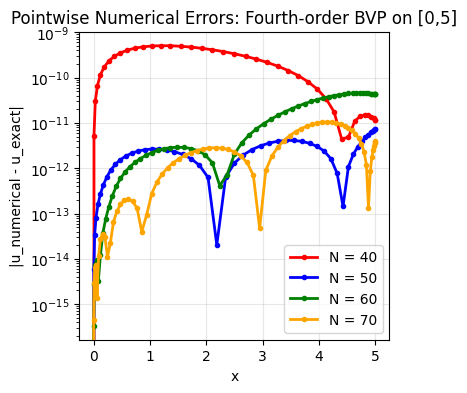

In [28]:
fig, ax = plt.subplots(figsize=fig_size)

for i, N in enumerate(N_values_p6):
    z_cheb, u_cheb = solutions_p6[N]
    u_exact_vals = u_exact_p6(z_cheb)
    error = np.abs(u_cheb - u_exact_vals)
    ax.semilogy(z_cheb, error, color=colors[i], linewidth=2, 
                marker='o', markersize=3, label=f'N = {N}')

ax.set_xlabel('x')
ax.set_ylabel('|u_numerical - u_exact|')
ax.set_title('Pointwise Numerical Errors: Fourth-order BVP on [0,5]')
ax.legend()
ax.grid(True, alpha=0.3)

plt.savefig("Figures/Fourth_order_BVP_p6_errors.pdf", bbox_inches='tight')
plt.show()


Convergence analysis:
N	Max Error		Reduction Factor
---------------------------------------------
 8	1.75e-01		N/A
12	5.96e-03		29.4
16	3.41e-04		17.5
20	9.71e-05		3.5
24	1.06e-05		9.2
28	6.19e-07		17.1
32	1.14e-08		54.4
36	3.93e-09		2.9
40	5.07e-10		7.8
44	3.54e-11		14.3
48	2.20e-11		1.6
52	2.19e-11		1.0
56	2.53e-11		0.9
60	4.61e-11		0.5
64	5.62e-11		0.8
68	3.75e-11		1.5
72	6.03e-11		0.6
76	2.07e-10		0.3
80	2.37e-10		0.9


/var/folders/5w/g3bx6wq50fj4mfkz1519zz_80000gp/T/ipykernel_83245/539476744.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


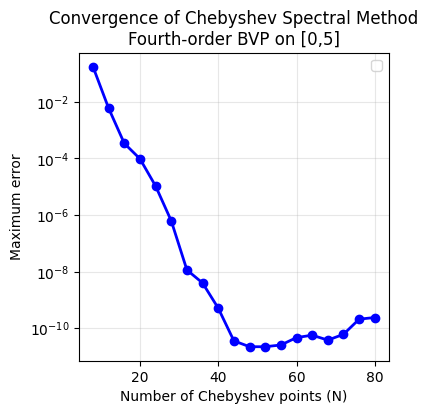

Machine precision not reached in the tested range N = 8 to 80
Minimum error achieved: 2.19e-11


In [29]:
N_range_p6 = np.arange(8, 81, 4)
max_errors_p6 = []

print("Convergence analysis:")
print("N\tMax Error\t\tReduction Factor")
print("-" * 45)

prev_error = None
for N in N_range_p6:
    try:
        z_cheb, u_cheb = solve_fourth_order_bvp_p6(N)
        u_exact_vals = u_exact_p6(z_cheb)
        max_error = np.max(np.abs(u_cheb - u_exact_vals))
        max_errors_p6.append(max_error)
        
        reduction_factor = prev_error / max_error if prev_error is not None else None
        reduction_str = f"{reduction_factor:.1f}" if reduction_factor is not None else "N/A"
        
        print(f"{N:2d}\t{max_error:.2e}\t\t{reduction_str}")

            
        prev_error = max_error
    except (np.linalg.LinAlgError, ValueError) as e:
        print(f"{N:2d}\tSolver failed: {str(e)[:30]}")
        max_errors_p6.append(np.nan)

# plot convergence
fig, ax = plt.subplots(figsize=fig_size)
valid_indices = ~np.isnan(max_errors_p6)
ax.semilogy(N_range_p6[:len(max_errors_p6)][valid_indices], 
            np.array(max_errors_p6)[valid_indices], 'bo-', linewidth=2, markersize=6)


ax.set_xlabel('Number of Chebyshev points (N)')
ax.set_ylabel('Maximum error')
ax.set_title('Convergence of Chebyshev Spectral Method\nFourth-order BVP on [0,5]')
ax.legend()
ax.grid(True, alpha=0.3)

plt.savefig("Figures/Fourth_order_BVP_p6_convergence.pdf", bbox_inches='tight')
plt.show()

machine_precision_N = None
for i, error in enumerate(max_errors_p6):
    if not np.isnan(error) and error < 1e-14:
        machine_precision_N = N_range_p6[i]
        break

if machine_precision_N:
    print(f"Machine precision (≈ 1e-14) is achieved at N = {machine_precision_N}")
    print(f"The Chebyshev spectral method shows exponential convergence for this smooth problem.")
else:
    print(f"Machine precision not reached in the tested range N = {N_range_p6[0]} to {N_range_p6[-1]}")
    print(f"Minimum error achieved: {np.nanmin(max_errors_p6):.2e}")
